In [32]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
from datetime import datetime as dt


In [33]:
import pandas as pd
import tarfile

# Caminho do arquivo .tar.gz
tar_path = "../data/accidents_2017_to_2023.tar.gz"

# Abre o tar.gz
with tarfile.open(tar_path, "r:gz") as tar:
    # Lista os arquivos dentro do tar.gz
    for member in tar.getmembers():
        print(member.name)  # Mostra os nomes dos arquivos dentro do .tar.gz
        
        # Se encontrar o CSV, lê direto para um DataFrame
        if member.name.endswith(".csv"):
            with tar.extractfile(member) as file:
                df = pd.read_csv(file)
                print(df.head())  # Mostra as primeiras linhas do CSV


./data
./data/accidents_2017_to_2023_portugues.csv
  data_inversa dia_semana   horario  uf     br     km       municipio  \
0   2017-01-01    domingo  01:45:00  RS  116.0   34,9         VACARIA   
1   2017-01-01    domingo  01:00:00  PR  376.0    636  TIJUCAS DO SUL   
2   2017-01-01    domingo  04:40:00  BA  101.0     65      ENTRE RIOS   
3   2017-01-01    domingo  06:30:00  PA  316.0   72,5       CASTANHAL   
4   2017-01-01    domingo  09:00:00  GO   20.0  220,5           POSSE   

                causa_acidente                tipo_acidente  \
0  Defeito Mecânico no Veículo             Colisão traseira   
1      Velocidade Incompatível    Saída de leito carroçável   
2            Condutor Dormindo              Colisão frontal   
3  Falta de Atenção à Condução              Colisão lateral   
4               Defeito na Via  Colisão com objeto estático   

  classificacao_acidente  ... feridos_leves feridos_graves ilesos ignorados  \
0    Com Vítimas Feridas  ...             4         

# Análise Exploratória

## 2 - Entendimento do conjuto de dados

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

In [35]:
df.describe()

,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


## 3 - Limpeza e Transformação dos Dados

In [36]:
# Convertendo as coluna da data dos acidentes (data_inversa) e horario para o formato data
df['data_acidente']= pd.to_datetime(df['data_inversa'] + df['horario'], format='%Y-%m-%d%H:%M:%S')
# Excluindo colunas desnecessárias
df = df.drop(columns=['delegacia', 'regional', 'data_inversa'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   dia_semana              463152 non-null  object        
 1   horario                 463152 non-null  object        
 2   uf                      463152 non-null  object        
 3   br                      462162 non-null  float64       
 4   km                      462162 non-null  object        
 5   municipio               463152 non-null  object        
 6   causa_acidente          463152 non-null  object        
 7   tipo_acidente           463112 non-null  object        
 8   classificacao_acidente  463152 non-null  object        
 9   fase_dia                463152 non-null  object        
 10  sentido_via             463152 non-null  object        
 11  condicao_metereologica  463152 non-null  object        
 12  tipo_pista              463152

In [37]:
# Alterando , por . na coluna km para que os valores sejam compreendidos como float
df['km'] = df['km'].str.replace(',', '.').astype(float)

In [38]:
# Encontrando duplicatas
df.duplicated().sum()

np.int64(9)

In [39]:
# Visualizar as duplicatas
duplicatas = df[df.duplicated(keep=False)]
duplicatas.head(20)

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
19243,sexta-feira,14:25:00,SC,282.0,483.9,FAXINAL DOS GUEDES,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-26.856710,-52.24642,2017-10-20 14:25:00
75470,sexta-feira,14:25:00,SC,282.0,483.9,FAXINAL DOS GUEDES,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-26.856710,-52.24642,2017-10-20 14:25:00
79108,sábado,17:00:00,GO,60.0,201.8,GUAPO,Pista Escorregadia,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-16.886220,-49.62302,2017-11-11 17:00:00
79109,sábado,17:00:00,GO,60.0,201.8,GUAPO,Pista Escorregadia,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-16.886220,-49.62302,2017-11-11 17:00:00
80504,domingo,15:40:00,RJ,40.0,113.0,DUQUE DE CAXIAS,Defeito na Via,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,0,1,0,2,0,1,2,-22.719200,-43.28960,2017-11-19 15:40:00
80505,domingo,15:40:00,RJ,40.0,113.0,DUQUE DE CAXIAS,Defeito na Via,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,0,1,0,2,0,1,2,-22.719200,-43.28960,2017-11-19 15:40:00
353536,quinta-feira,17:30:00,SC,101.0,135.3,BALNEARIO CAMBORIU,Acessar a via sem observar a presença dos outr...,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,0,1,0,1,0,1,2,-27.005010,-48.62677,2021-12-16 17:30:00
354092,quinta-feira,17:30:00,SC,101.0,135.3,BALNEARIO CAMBORIU,Acessar a via sem observar a presença dos outr...,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,0,1,0,1,0,1,2,-27.005010,-48.62677,2021-12-16 17:30:00
381910,quarta-feira,20:19:00,GO,50.0,263.5,CATALAO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,...,0,1,0,0,0,1,1,-18.052100,-47.86300,2022-03-30 20:19:00
381911,quarta-feira,20:19:00,GO,50.0,263.5,CATALAO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,...,0,1,0,0,0,1,1,-18.052100,-47.86300,2022-03-30 20:19:00


In [40]:
# Removendo dados duplicados
df.drop_duplicates(inplace=True)

In [41]:
# Criando um segundo dataframe somente com os dados de Pernambuco
df_pe = df[df['uf']=='PE']
df_pe.head()

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
15,domingo,15:55:00,PE,101.0,62.8,RECIFE,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,...,0,0,1,1,1,1,1,-8.007427,-34.93785,2017-01-01 15:55:00
24,domingo,22:00:00,PE,232.0,142.0,SAO CAITANO,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Plena Noite,...,0,0,0,2,0,0,2,-8.326607,-36.11564,2017-01-01 22:00:00
25,domingo,21:30:00,PE,232.0,84.7,GRAVATA,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Plena Noite,...,0,0,0,1,0,0,1,-8.215031,-35.63572,2017-01-01 21:30:00
34,segunda-feira,06:30:00,PE,101.0,23.0,GOIANA,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-7.684500,-34.92370,2017-01-02 06:30:00
51,segunda-feira,13:50:00,PE,101.0,73.2,RECIFE,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,...,0,0,0,3,0,0,2,-8.096529,-34.94960,2017-01-02 13:50:00


## 4 - Análise de Outliers

### Brasil

In [42]:
df.describe()

,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
count,462153.000000,462153.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,4.631430e+05,4.631430e+05,463143
mean,213.434129,261.391031,2.362363,0.079237,0.835472,0.259533,1.044049,0.144072,1.095005,1.645723,-2.343332e+03,-8.925150e+03,2020-03-02 14:24:25.126407936
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09,2017-01-01 00:00:00
25%,101.000000,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533118e+01,-5.030294e+01,2018-05-05 19:50:00
50%,163.000000,196.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042032e+01,-4.780831e+01,2020-01-29 14:45:00
75%,324.000000,410.800000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264234e+01,2021-11-22 19:30:00
max,498.000000,1454.500000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02,2023-08-31 23:59:00
std,130.757799,227.456420,1.924808,0.332172,1.075282,0.602818,1.502414,0.438172,1.205357,0.731398,1.519128e+06,5.903100e+06,NaN


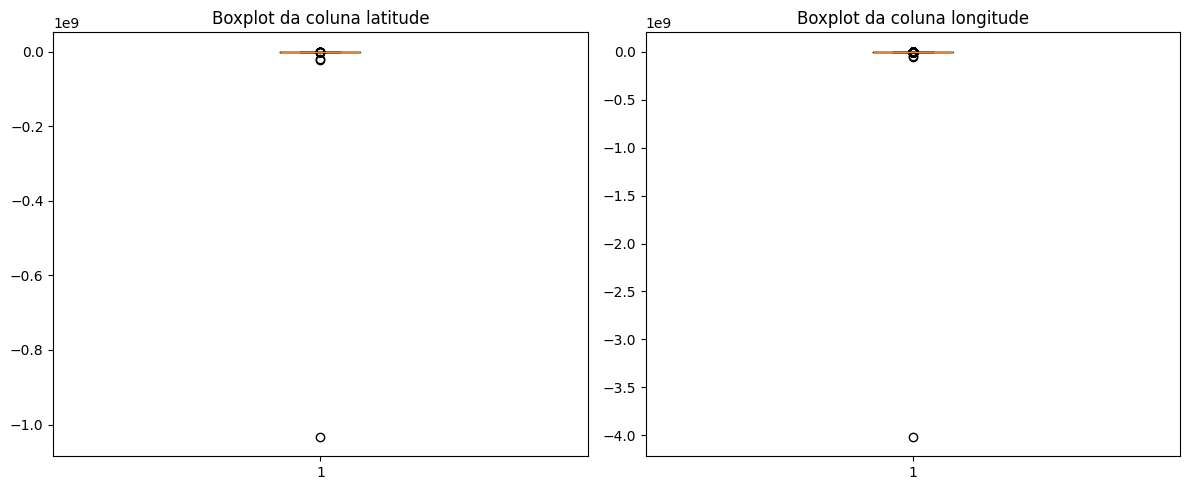

In [43]:
fig, ax = plt.subplots(1,2,figsize=(12,5), tight_layout=True)

ax[0].boxplot(df['latitude'])
ax[0].set_title('Boxplot da coluna latitude')

ax[1].boxplot(df['longitude'])
ax[1].set_title('Boxplot da coluna longitude')

plt.show()

In [44]:
# Encontrando outliers, considerando os valores máximos e mínimos possíveis de latitude (-90 a 90) e longitude (-180 a 180)
df[(df['latitude']<-90) | (df['latitude']>90) | (df['longitude']<-180) | (df['longitude']>180)]

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
114,terça-feira,19:00:00,MG,381.0,873.0,ESTIVA,Pista Escorregadia,Tombamento,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-2.241851e+01,-4.059646e+02,2017-01-03 19:00:00
117,terça-feira,18:50:00,RJ,40.0,64.0,PETROPOLIS,Fenômenos da Natureza,Colisão com objeto em movimento,Com Vítimas Feridas,Plena Noite,...,0,0,1,1,0,1,1,-2.242356e+01,-7.631568e+02,2017-01-03 18:50:00
166,terça-feira,13:00:00,BA,101.0,323.4,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,Colisão lateral,Com Vítimas Feridas,Pleno dia,...,0,0,2,0,0,2,2,1.255456e+01,-4.113281e+02,2017-01-03 13:00:00
233,quinta-feira,19:45:00,SC,101.0,40.7,JOINVILLE,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Plena Noite,...,0,0,0,1,0,0,1,-2.631464e+01,3.111264e+02,2017-01-05 19:45:00
301,sexta-feira,20:40:00,MT,364.0,315.7,CAMPO VERDE,Ultrapassagem Indevida,Colisão lateral,Sem Vítimas,Plena Noite,...,0,0,0,4,0,0,4,1.580000e+02,5.530000e+02,2017-01-06 20:40:00
321,sábado,09:20:00,SP,116.0,292.0,ITAPECERICA DA SERRA,Velocidade Incompatível,Capotamento,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-2.373232e+01,-4.068950e+02,2017-01-07 09:20:00
355,sábado,22:25:00,PR,277.0,36.3,MORRETES,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Plena Noite,...,0,0,0,2,0,0,2,-2.557372e+01,-4.088183e+02,2017-01-07 22:25:00
528,quarta-feira,09:00:00,PR,369.0,175.5,ROLANDIA,Condutor Dormindo,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-2.332490e+07,-5.138635e+07,2017-01-11 09:00:00
24667,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,...,0,2,0,0,0,2,1,-2.336952e+01,3.099351e+02,2017-01-01 00:00:00
24729,domingo,08:00:00,MT,163.0,790.0,VERA,Velocidade Incompatível,Saída de leito carroçável,Sem Vítimas,Amanhecer,...,0,0,0,0,1,0,1,-1.227493e+01,-4.155582e+02,2017-01-01 08:00:00


In [45]:
# Encontrando os outliers
df[df['latitude']<-1*10**3]

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
528,quarta-feira,09:00:00,PR,369.0,175.5,ROLANDIA,Condutor Dormindo,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-2.332490e+07,-5.138635e+07,2017-01-11 09:00:00
24786,domingo,16:20:00,MG,381.0,442.9,SABARA,Velocidade Incompatível,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,0,0,1,1,0,1,2,-1.984326e+07,-4.386112e+07,2017-01-01 16:20:00
24971,segunda-feira,10:30:00,BA,407.0,111.0,JAGUARARI,Não guardar distância de segurança,Engavetamento,Sem Vítimas,Pleno dia,...,0,0,0,3,0,0,3,-1.033383e+09,-4.016764e+09,2017-01-02 10:30:00


In [46]:
df.loc[24971, ['latitude', 'longitude']]

latitude    -1033383000.0
longitude   -4016764000.0
Name: 24971, dtype: object

Identificamos os valores acima como outliers. Porém ao verificar os dados das demais colunas, vimos que os outliers estavam apenas nas colunas de latitude e longitude, sendo provavelmente um erro de digitação. Pensamos em alterar apenas esses dados, mas decimos não fazer alterações, considerando que a princípio não utilizaremos essas colunas então retirar os registros completos não faz sentido.

### Pernambuco

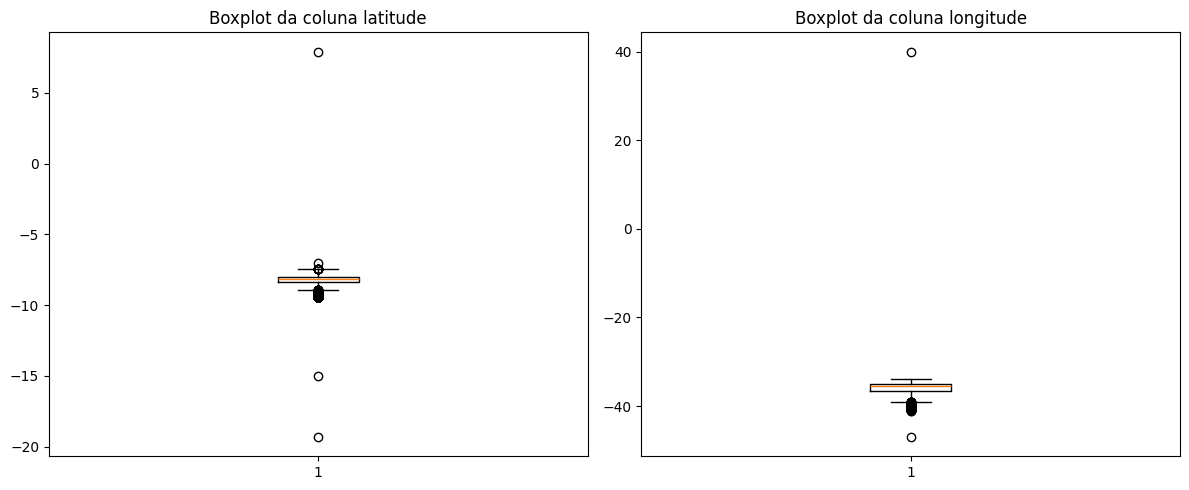

In [47]:
fig, ax = plt.subplots(1,2,figsize=(12,5), tight_layout=True)

ax[0].boxplot(df_pe['latitude'])
ax[0].set_title('Boxplot da coluna latitude')

ax[1].boxplot(df_pe['longitude'])
ax[1].set_title('Boxplot da coluna longitude')

plt.show()

In [48]:
# Os valores de latitude e Longitude de Pernambuco estão dentro do intervalo esperado
df_pe[(df_pe['latitude']<-13) | (df_pe['latitude']>-7.4)]

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
372,domingo,11:00:00,PE,101.0,60.0,RECIFE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-15.00000,-47.00000,2017-01-08 11:00:00
24825,domingo,17:40:00,PE,101.0,144.0,RIBEIRAO,Velocidade Incompatível,Queda de ocupante de veículo,Com Vítimas Feridas,Anoitecer,...,0,2,0,0,0,2,1,-19.31114,-34.74426,2017-01-01 17:40:00
24877,domingo,21:10:00,PE,101.0,59.0,RECIFE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Plena Noite,...,0,0,0,20,0,0,5,-7.00000,-34.00000,2017-01-01 21:10:00
25910,sábado,23:35:00,PE,316.0,91.0,OURICURI,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,...,1,0,0,1,0,0,1,7.90890,40.01630,2017-01-07 23:35:00


In [49]:
df_pe.drop([372, 24825, 24877, 25910], axis=0, inplace = True)
df_pe[(df_pe['latitude']<-13) | (df_pe['latitude']>-7.4)]

C:\Users\geron\AppData\Local\Temp\ipykernel_21476\2128232510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe.drop([372, 24825, 24877, 25910], axis=0, inplace = True)


,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente


No caso dos outliers do banco de dados de Pernambuco, decidimos por apagar os registros com outliers, pois utilizamos os dados de latitude e longitude para gerar visualizações gráficas dos acidentes e mortes nas estradas e a presença dos outliers estava culminando em imagens incorretas.

In [50]:
imagem = '../utils/bcim_2016_21_11_2018.gpkg'

C:\Users\geron\AppData\Local\Temp\ipykernel_21476\3203777977.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)


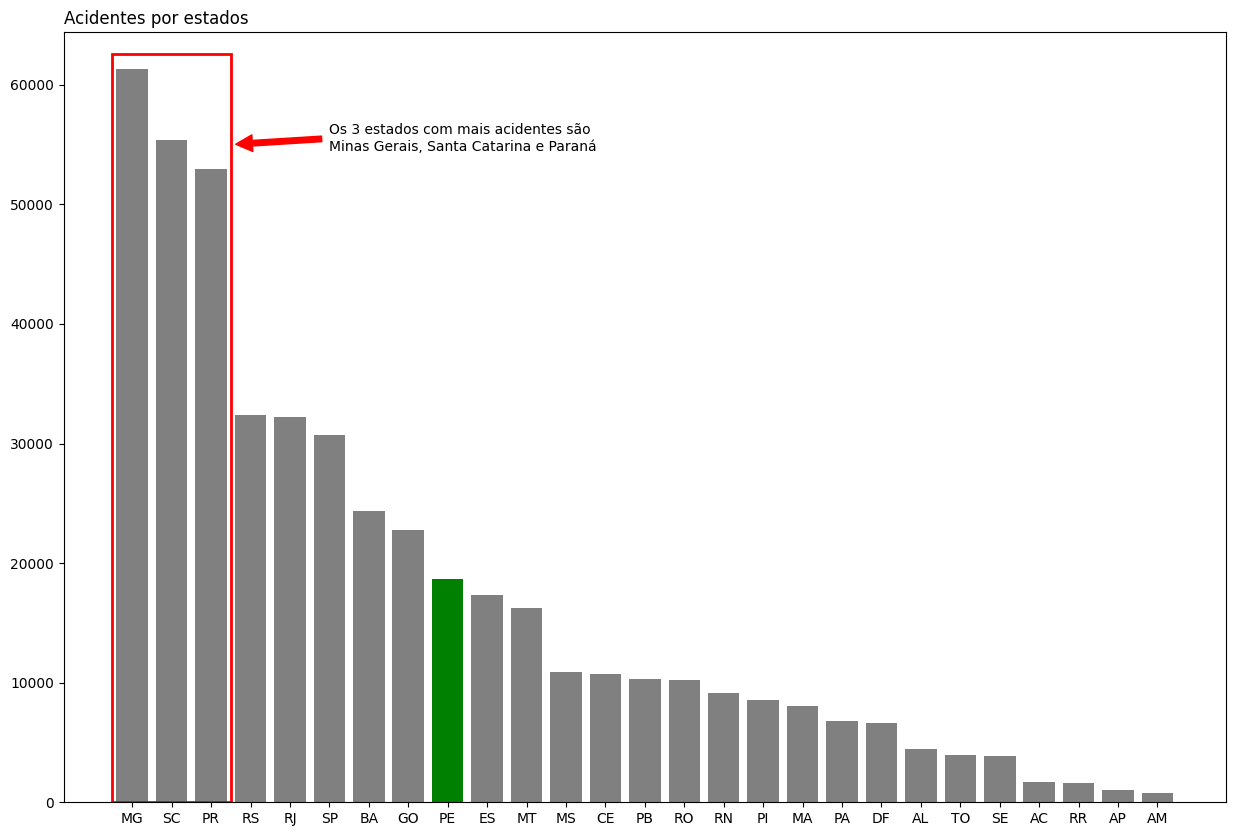

In [51]:
# Gráfico do Número de acidentes por Estado
df_acidentes = df[['uf', 'data_acidente']].groupby(by=df['uf']).agg({'data_acidente': 'count'}).sort_values(by='data_acidente', ascending=False)
df_mortes = df[['uf', 'mortos']].groupby(by=df['uf']).agg({'mortos': 'sum'}).sort_values(by='mortos', ascending=False)


fig, ax = plt.subplots(figsize=(15,10))
cores2 = ['gray' if uf != 'PE' else 'green' for uf in df_acidentes.index]
ax.bar(df_acidentes.index, df_acidentes['data_acidente'], color=cores2)
ax.set_title('Acidentes por estados', loc='left')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)

import matplotlib.patches as patches
rect = patches.Rectangle(
    xy=(-0.5, 0),  # Coordenada inferior esquerda (x, y)
    width=3,  # Largura do retângulo
    height=df_acidentes['data_acidente'].max() * 1.02,  # Altura do retângulo
    linewidth=2,  # Espessura da linha
    edgecolor='red',  # Cor do contorno
    facecolor='none'  # Sem preenchimento interno
)

# Adicionar o retângulo ao gráfico
ax.add_patch(rect)

ax.annotate(
    xy = (2.5,55000),
    text="Os 3 estados com mais acidentes são \nMinas Gerais, Santa Catarina e Paraná",  # Texto da anotação
    arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05), xytext=(5, 54500)
)

plt.show()

# Análise Explanatória

## Insight 1 - Principais causas dos acidentes nos estados com mais mortes

C:\Users\geron\AppData\Local\Temp\ipykernel_21476\2116913030.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


Text(5, 4104.65, 'Os 3 estados com mais mortes são \nMinas Gerais, Paraná e Bahia')

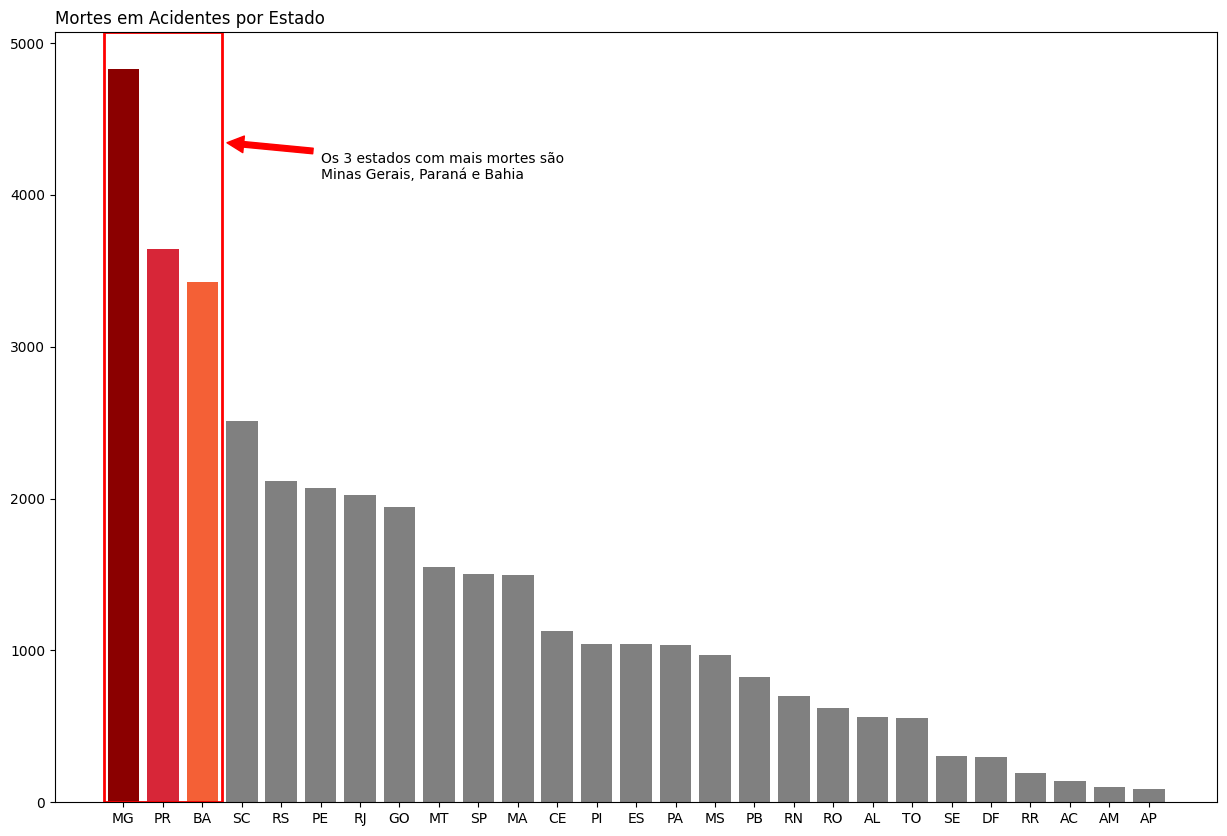

In [52]:
# Definição das cores para os três primeiros estados e cinza para os demais
cores_personalizadas = ["#8B0000", "#D72638", "#F46036"]  # Cores corrigidas
cores = [cores_personalizadas[i] if i < 3 else "gray" for i in range(len(df_mortes))]

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(15, 10))

# Plotar o gráfico de barras com as cores ajustadas
ax.bar(df_mortes.index, df_mortes['mortos'], color=cores)

# Configurações do título e eixos
ax.set_title('Mortes em Acidentes por Estado', loc='left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Adicionar um retângulo de destaque nos três primeiros estados
rect = patches.Rectangle(
    xy=(-0.5, 0),  # Coordenada inferior esquerda (x, y)
    width=3,  # Largura do retângulo (destaca os 3 primeiros)
    height=max(df_mortes['mortos']) * 1.05,  # Ajuste automático na altura
    linewidth=2,  # Espessura da linha
    edgecolor='red',  # Cor do contorno
    facecolor='none'  # Sem preenchimento interno
)
ax.add_patch(rect)

# Adicionar anotação
ax.annotate(
    xy=(2.5, max(df_mortes['mortos']) * 0.9),
    text="Os 3 estados com mais mortes são \nMinas Gerais, Paraná e Bahia",
    arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.05),
    xytext=(5, max(df_mortes['mortos']) * 0.85)
)


C:\Users\geron\AppData\Local\Temp\ipykernel_21476\3847357304.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds', len(df_mortes))  # Alterado para 'Reds'
C:\Users\geron\AppData\Local\Temp\ipykernel_21476\3847357304.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = brasil_mortes.geometry.centroid
C:\Users\geron\AppData\Local\Temp\ipykernel_21476\3847357304.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top5 = df[df['uf'].isin(['MG', 'PR', 'BA'])][df['causa_acidente'].isin(colunas)]


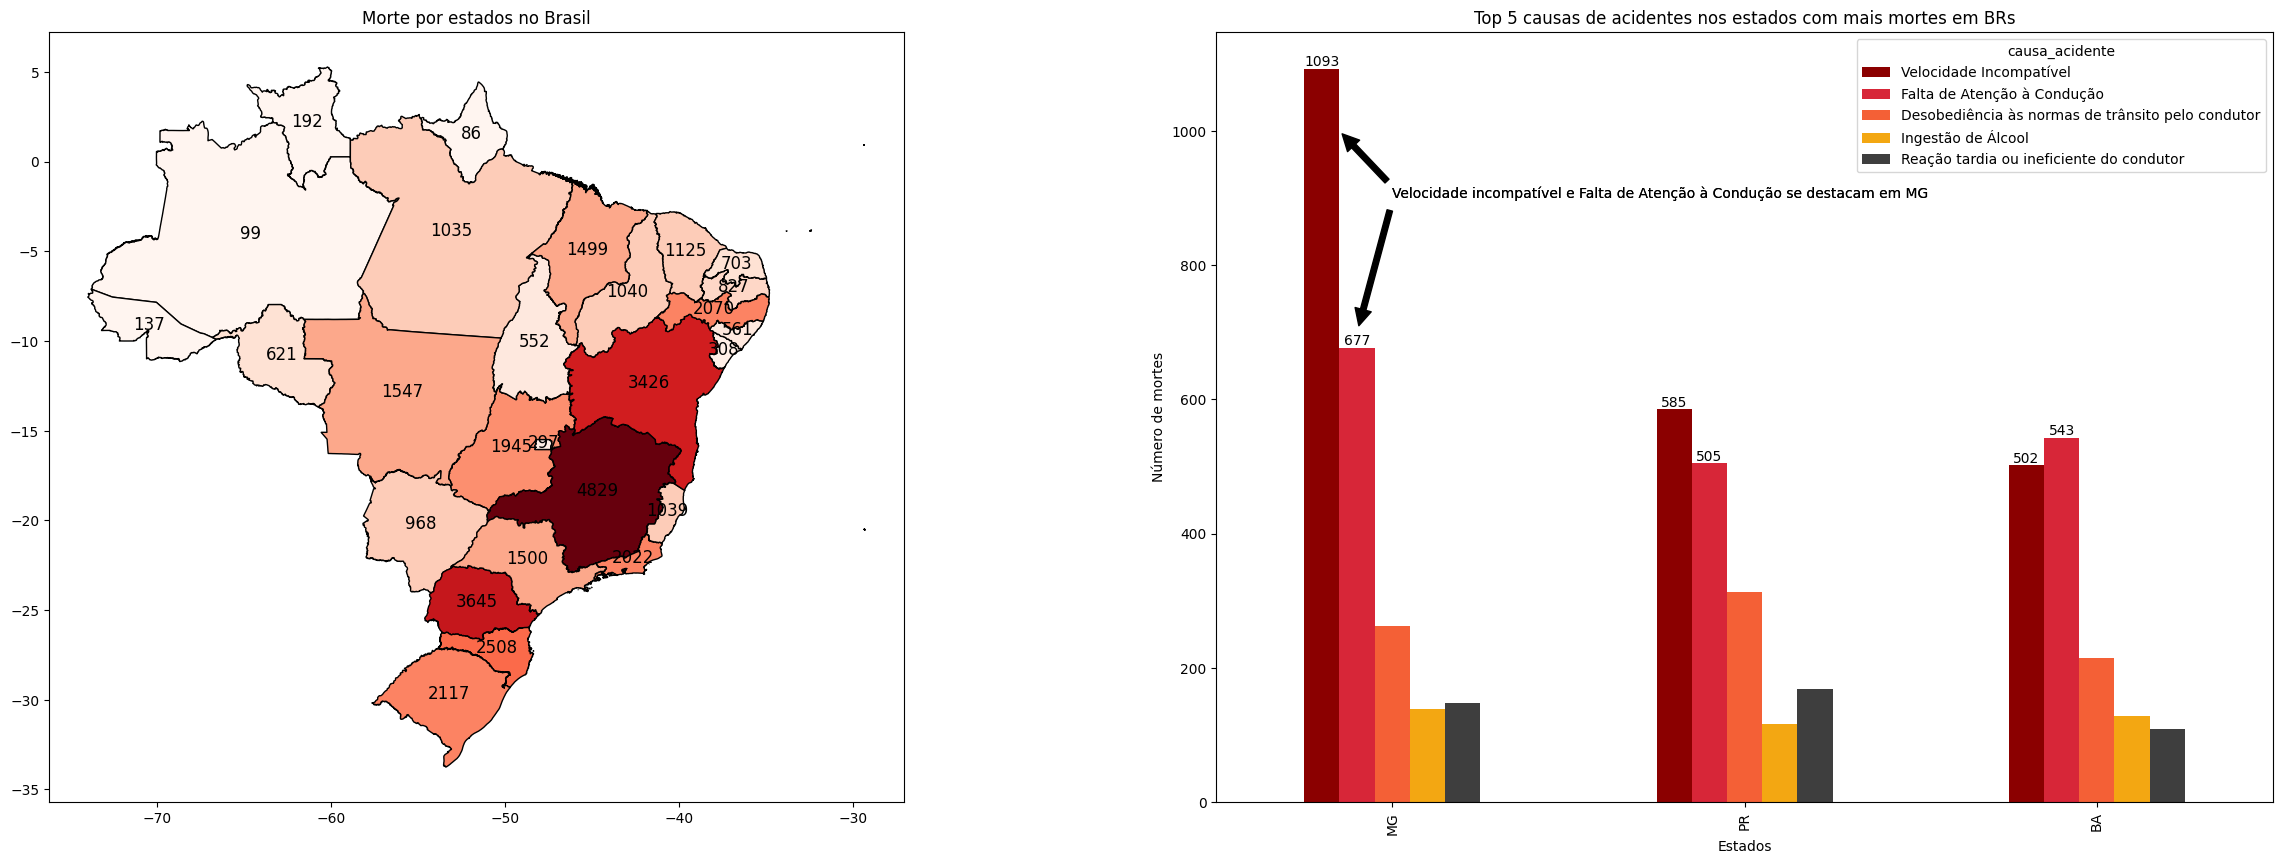

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt

colunas = list(df['causa_acidente'].value_counts().head(5).index)

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

# Criação de df info_ufs com os dados baixados do site do IBGE
info_ufs = gpd.read_file(imagem, layer='lim_unidade_federacao_a')
info_ufs.rename({'sigla': 'uf'}, axis=1, inplace=True)

# df de Mortes por estados
df_mortes = df[['uf', 'mortos']].groupby(by=df['uf']).agg({'mortos': 'sum'}).sort_values(by='mortos', ascending=False)

# Criação de nova df com junção de df_mortes e info_ufs
brasil_mortes = info_ufs.merge(df_mortes, on='uf', how='left')

# Escala de cores de acordo com a quantidade de mortes (gradiente vermelho)
cmap = plt.cm.get_cmap('Reds', len(df_mortes))  # Alterado para 'Reds'

# Criação de gráfico do mapa do brasil
brasil_mortes.plot(column='mortos', cmap=cmap, legend=False, edgecolor='black', ax=ax[0])

centroids = brasil_mortes.geometry.centroid
counts = brasil_mortes['mortos']

for idx, (centroid, count) in enumerate(zip(centroids, counts)):
    ax[0].annotate(f'{count:.0f}', (centroid.x, centroid.y), textcoords="offset points", xytext=(0, -2), ha='center', fontsize=12, color='black')

ax[0].set_title('Morte por estados no Brasil')

# Gráfico de barras
df_top5 = df[df['uf'].isin(['MG', 'PR', 'BA'])][df['causa_acidente'].isin(colunas)]

df_top5_group = df_top5[['uf', 'causa_acidente', 'mortos']].groupby(by=['uf', 'causa_acidente']).sum('mortos').unstack()

df_top5_group = df_top5_group.reindex(['MG', 'PR', 'BA'])

nova_coluna = ['Velocidade Incompatível', 'Falta de Atenção à Condução', 'Desobediência às normas de trânsito pelo condutor', 'Ingestão de Álcool', 'Reação tardia ou ineficiente do condutor']

df_top5_group = df_top5_group['mortos'][nova_coluna].plot(kind='bar', ax=ax[1], color=['#8B0000', '#D72638', '#F46036', '#F3A712', '#3E3E3E'])

ax[1].set_title('Top 5 causas de acidentes nos estados com mais mortes em BRs')
ax[1].set_xlabel('Estados')
ax[1].set_ylabel('Número de mortes')

ax[1].annotate('Velocidade incompatível e Falta de Atenção à Condução se destacam em MG', xy=(-0.15, 1000), xytext=(0, 900),
               arrowprops=dict(facecolor='black', shrink=0.05))

ax[1].annotate('Velocidade incompatível e Falta de Atenção à Condução se destacam em MG', xy=(-0.1, 700), xytext=(0, 900),
               arrowprops=dict(facecolor='black', shrink=0.05))

for i, patch in enumerate(ax[1].patches):
    # Check if it's one of the first two bars of the current state
    if i in ([0, 1, 2, 3, 4, 5]):
        height = patch.get_height()  # Get the height of the bar

        # Calculate the x-coordinate of the label
        x = patch.get_x() + patch.get_width() / 2

        # Add the text label
        ax[1].text(x, height, f'{int(height)}', ha='center', va='bottom')

plt.show()


In [54]:
df[['dia_semana','causa_acidente']].value_counts()

dia_semana     causa_acidente                             
sexta-feira    Falta de Atenção à Condução                    17134
sábado         Falta de Atenção à Condução                    16956
domingo        Falta de Atenção à Condução                    16186
segunda-feira  Falta de Atenção à Condução                    14954
quinta-feira   Falta de Atenção à Condução                    14611
                                                              ...  
sábado         Transtornos Mentais (exceto suicidio)              1
               Suicídio (presumido)                               1
terça-feira    Faixas de trânsito com largura insuficiente        1
domingo        Transtornos Mentais (exceto suicidio)              1
terça-feira    Redutor de velocidade em desacordo                 1
Name: count, Length: 617, dtype: int64

In [55]:
df_counts = df.value_counts(["dia_semana", "causa_acidente"]).reset_index(name="quantidade")
df_counts=df_counts[df_counts['causa_acidente'].isin(['Velocidade Incompatível','Falta de Atenção à Condução','Ingestão de Álcool','Desobediência às normas de trânsito pelo condutor','Reação tardia ou ineficiente do condutor'])]
df_counts

,dia_semana,causa_acidente,quantidade
0,sexta-feira,Falta de Atenção à Condução,17134
1,sábado,Falta de Atenção à Condução,16956
2,domingo,Falta de Atenção à Condução,16186
3,segunda-feira,Falta de Atenção à Condução,14954
4,quinta-feira,Falta de Atenção à Condução,14611
5,quarta-feira,Falta de Atenção à Condução,14178
6,terça-feira,Falta de Atenção à Condução,13769
7,domingo,Velocidade Incompatível,8349
8,sábado,Velocidade Incompatível,7878
9,domingo,Ingestão de Álcool,7027


In [56]:
fig = px.bar(df_counts,
             y="dia_semana",
             x="quantidade",
             color="causa_acidente",
             barmode="stack",
             orientation="h",
             title='Causa de acidentes por dia da semana',
             category_orders={'dia_semana': ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo']},
             text_auto=True,
             color_discrete_map={
                 "Falta de Atenção à Condução": "#8B0000",
                 "Velocidade Incompatível": "#D72638",
                 "Ingestão de Álcool": "#F46036",
                 "Desobediência às normas de trânsito pelo condutor": "#F3A712",
                 "Reação tardia ou ineficiente do condutor": "#3E3E3E"
             }  # Substitua pelos nomes corretos das causas
            )

fig.add_annotation(
    x=40000,  # Valor no eixo X onde a anotação será colocada
    y="sexta-feira",  # Dia da semana no eixo Y
    text="Aumento de acidentes por Ingestão de alcool <br> e Velocidade incompatível no final de semana",  # Texto da anotação
    showarrow=True,  # Exibir uma seta
    arrowhead=3,  # Tipo da seta
    ax=50,  # Deslocamento horizontal da seta
    ay=0,  # Deslocamento vertical da seta
    bgcolor="red",  # Cor de fundo da anotação
    font=dict(color="white", size=12)  # Cor e tamanho do texto
)

fig.show()

## Insight 2 - Mais acidentes próximo a datas de feriados em Pernambuco

In [57]:
df_pe['ano']=df['data_acidente'].dt.year
df_pe

C:\Users\geron\AppData\Local\Temp\ipykernel_21476\2536732588.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente,ano
15,domingo,15:55:00,PE,101.0,62.8,RECIFE,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,...,0,1,1,1,1,1,-8.007427,-34.93785,2017-01-01 15:55:00,2017
24,domingo,22:00:00,PE,232.0,142.0,SAO CAITANO,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Plena Noite,...,0,0,2,0,0,2,-8.326607,-36.11564,2017-01-01 22:00:00,2017
25,domingo,21:30:00,PE,232.0,84.7,GRAVATA,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Plena Noite,...,0,0,1,0,0,1,-8.215031,-35.63572,2017-01-01 21:30:00,2017
34,segunda-feira,06:30:00,PE,101.0,23.0,GOIANA,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,2,0,0,2,-7.684500,-34.92370,2017-01-02 06:30:00,2017
51,segunda-feira,13:50:00,PE,101.0,73.2,RECIFE,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,...,0,0,3,0,0,2,-8.096529,-34.94960,2017-01-02 13:50:00,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462858,quarta-feira,18:00:00,PE,104.0,113.0,PANELAS,Pista esburacada,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,...,0,1,0,0,1,1,-8.643015,-36.01540,2023-08-30 18:00:00,2023
462871,quarta-feira,20:07:00,PE,104.0,61.0,CARUARU,Acessar a via sem observar a presença dos outr...,Colisão transversal,Com Vítimas Feridas,Plena Noite,...,2,0,1,0,2,2,-8.245830,-35.97492,2023-08-30 20:07:00,2023
462936,sábado,15:30:00,PE,104.0,62.0,CARUARU,Manobra de mudança de faixa,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,0,1,1,0,1,2,-8.261800,-35.97600,2023-07-29 15:30:00,2023
462963,quinta-feira,16:40:00,PE,104.0,61.0,CARUARU,Manobra de mudança de faixa,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,...,3,0,0,0,3,2,-8.252900,-35.97510,2023-08-31 16:40:00,2023


In [59]:
df_pe_2022=df_pe[df_pe['ano']==2022][['data_acidente','mortos']].groupby('data_acidente').agg({'mortos':'sum'})
df_pe_2022[df_pe_2022['mortos']>3]

,mortos
data_acidente,
2022-12-10 03:30:00,5
2022-12-31 04:30:00,5


KeyError: Timestamp('2022-01-16 00:00:00')

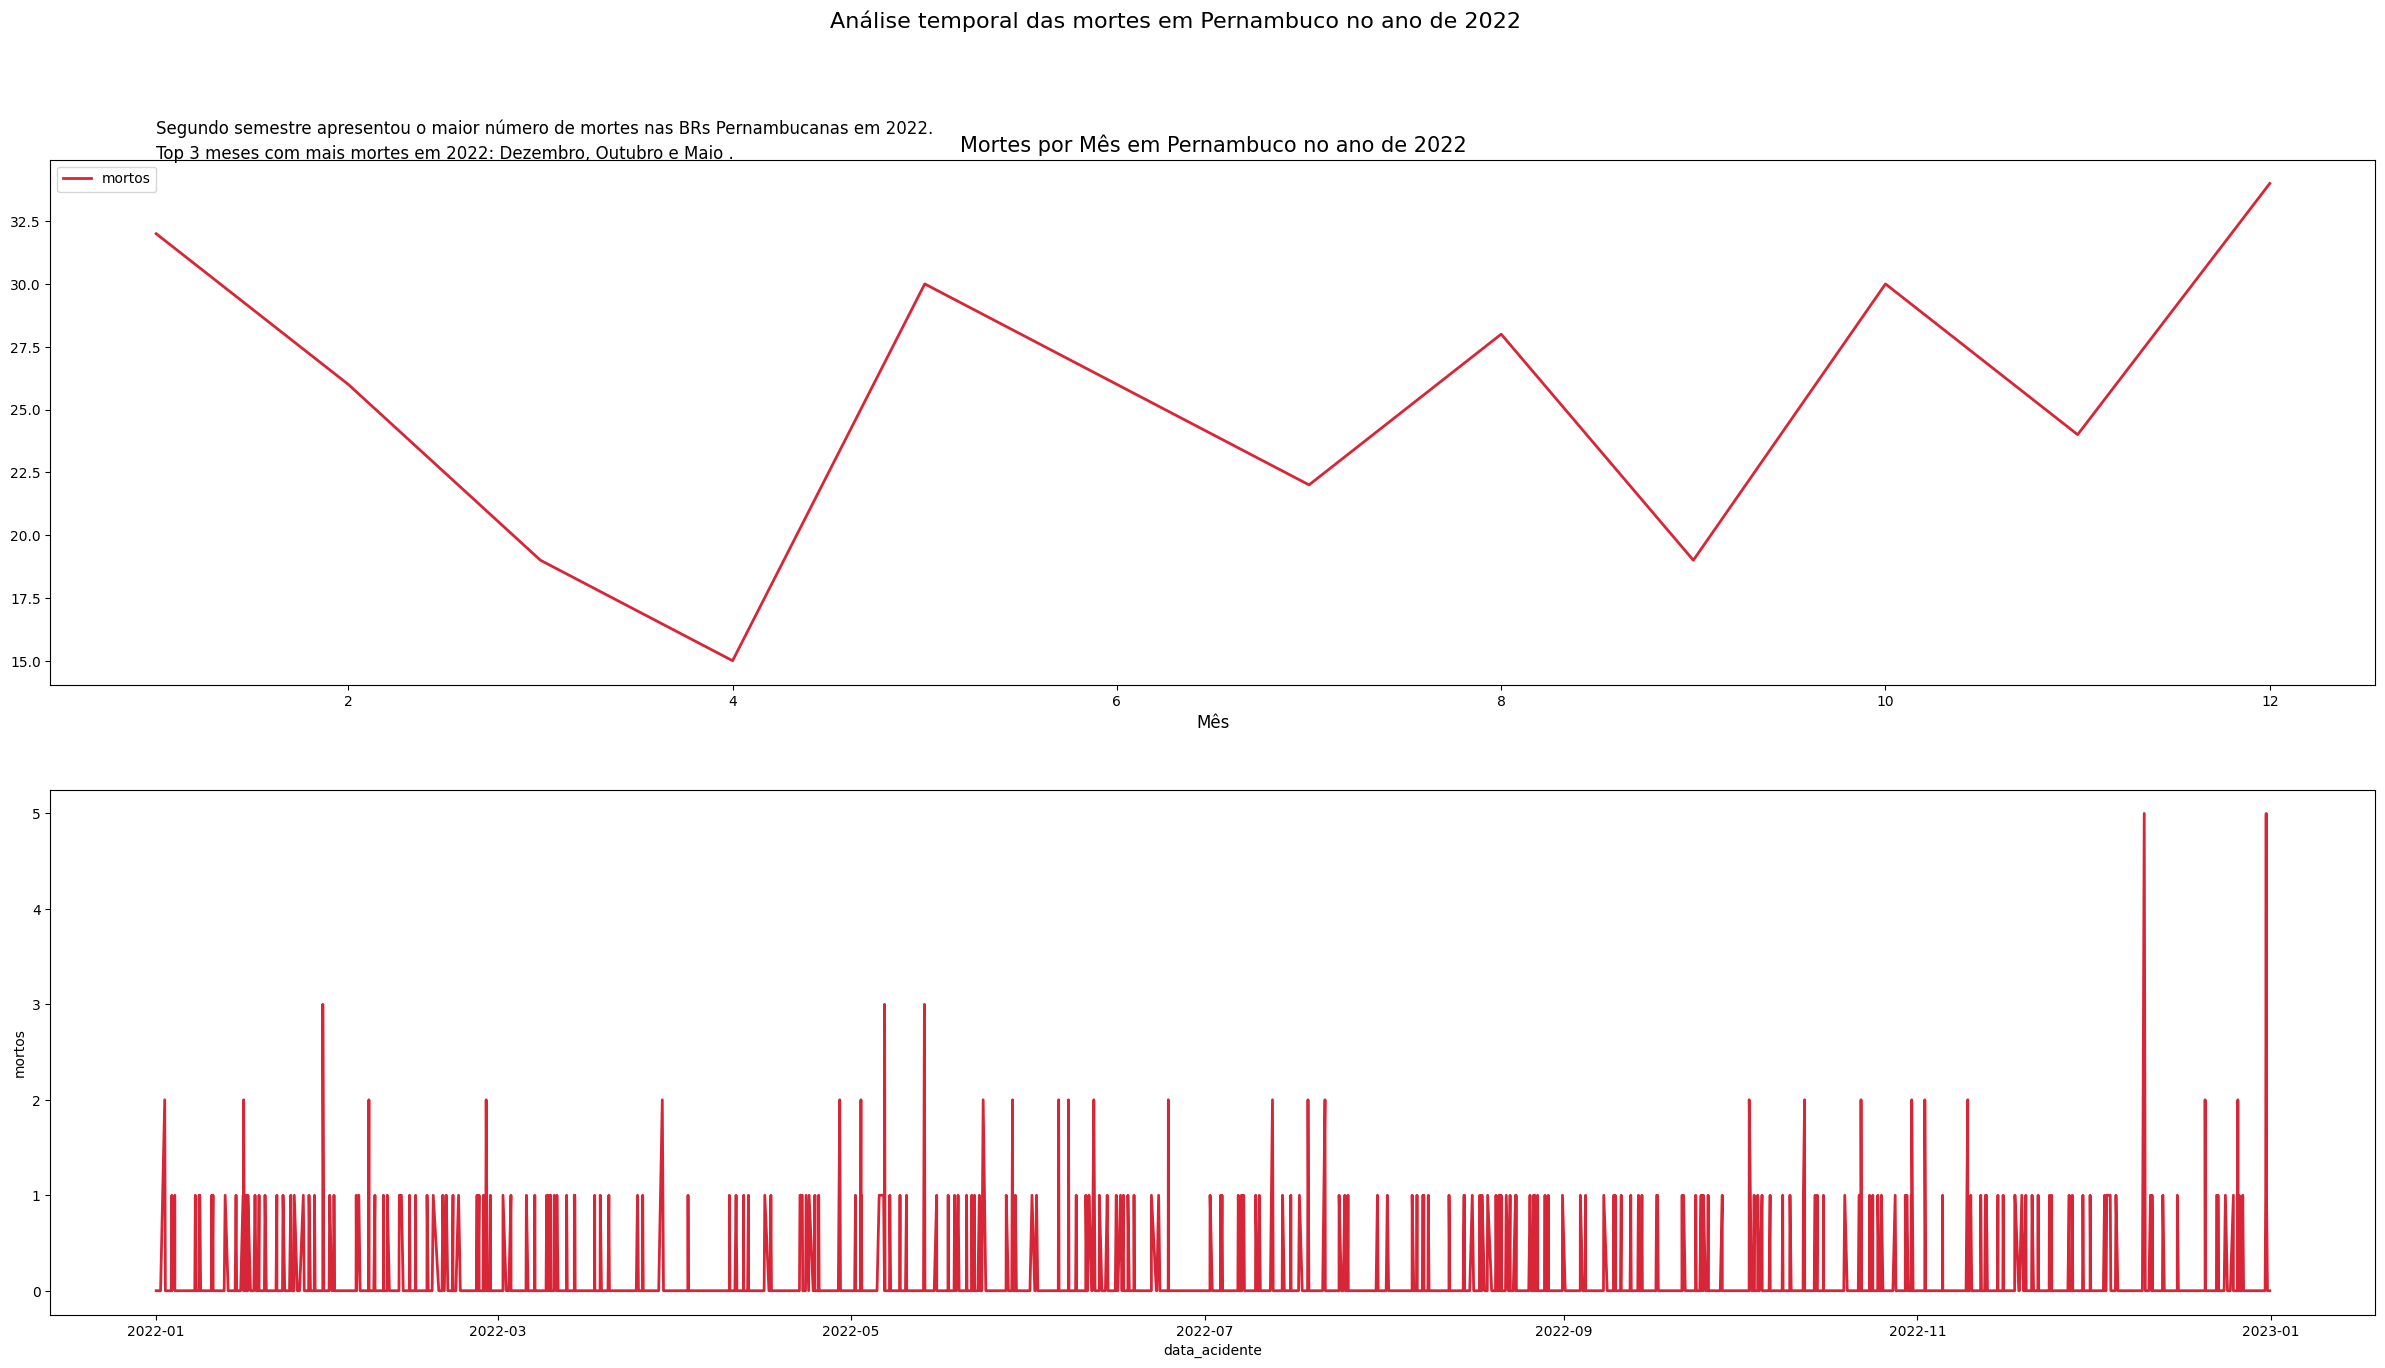

In [60]:
fig, ax = plt.subplots(2,1,figsize=(30,15))

plt.suptitle('Análise temporal das mortes em Pernambuco no ano de 2022', size=16)
#Mortes por mês em 2022

data=df_pe_2022.reset_index()
data['data_acidente']=pd.to_datetime(data['data_acidente'], format = '%d-%m-%Y')
data.groupby(data['data_acidente'].dt.month).agg({'mortos':'sum'}).plot(ax=ax[0], color='#D72638', linewidth=2)
ax[0].text(1,36,'Segundo semestre apresentou o maior número de mortes nas BRs Pernambucanas em 2022.', size=12)
ax[0].text(1,35,'Top 3 meses com mais mortes em 2022: Dezembro, Outubro e Maio .', size=12)
ax[0].set_title('Mortes por Mês em Pernambuco no ano de 2022', size=15)
ax[0].set_xlabel('Mês', size=12)

#Mortes por dia do Ano
df_pe_2022=df_pe[df_pe['ano']==2022][['data_acidente','mortos']].groupby('data_acidente').agg({'mortos':'sum'})

df_pe_2022.index=df_pe_2022.index.astype('datetime64[ns]')

sns.lineplot(data=df_pe_2022, x=df_pe_2022.index, y='mortos', ax=ax[1], color='#D72638', linewidth=2)



datas_anotacoes = ['2022-05-06', '2022-06-05', '2022-10-12','2022-11-06','2022-01-16','2022-12-22','2022-12-26','2022-12-31']

ax[1].annotate(text='Domingo - 16/01',xy=(pd.to_datetime('2022-01-16'), df_pe_2022.loc[pd.to_datetime('2022-01-16'), 'mortos']),  # Coordenadas do ponto
                xytext=(0, 10),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)


ax[1].annotate(text='Sexta-Feira 06/05',xy=(pd.to_datetime('2022-05-06'), df_pe_2022.loc[pd.to_datetime('2022-05-06'), 'mortos']),  # Coordenadas do ponto
                xytext=(0, 30),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)


ax[1].annotate(text='Domingo 05/06',xy=(pd.to_datetime('2022-06-05'), df_pe_2022.loc[pd.to_datetime('2022-06-05'), 'mortos']),  # Coordenadas do ponto
                xytext=(0, 10),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)


ax[1].annotate(text='12/10 - Dia de Nossa Senhora aparecida',xy=(pd.to_datetime('2022-10-12'), df_pe_2022.loc[pd.to_datetime('2022-10-12'), 'mortos']),  # Coordenadas do ponto
                xytext=(-30, 10),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)


ax[1].annotate(text='06/11 - Volta do feriado de Finados',xy=(pd.to_datetime('2022-11-06'), df_pe_2022.loc[pd.to_datetime('2022-11-06'), 'mortos']),  # Coordenadas do ponto
                xytext=(0, 50),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)


ax[1].annotate(text='22/12 - Quinta-Feira próxima ao Natal',xy=(pd.to_datetime('2022-12-22'), df_pe_2022.loc[pd.to_datetime('2022-12-22'), 'mortos']),  # Coordenadas do ponto
                xytext=(-50, 70),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)

ax[1].annotate(text='26/12 - Segunda-Feira após Natal',xy=(pd.to_datetime('2022-12-26'), df_pe_2022.loc[pd.to_datetime('2022-12-26'), 'mortos']),  # Coordenadas do ponto
                xytext=(60, 30),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)

ax[1].annotate(text='31/12 - Véspera de Ano novo',xy=(pd.to_datetime('2022-12-31'), df_pe_2022.loc[pd.to_datetime('2022-12-31'), 'mortos']),  # Coordenadas do ponto
                xytext=(0, 10),  # Deslocamento do texto
                textcoords="offset points",  # Sistema de coordenadas para xytext
                ha='center',  # Alinhamento horizontal do texto
                arrowprops=dict(arrowstyle="->"), size=12)  # Estilo da seta (opcional)

ax[1].text(x=pd.to_datetime('2022-06-01'), y= 7, s='Maioria dos acidentes fatais do segundo semestre aconteceram em épocas de feriados', size=12)
ax[1].set_title('Mortes por dia em Pernambuco no ano de 2022', size=15)


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)


ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)


ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)

plt.show()





## Insight 3 - Taxa de Acidentalidade e de Mortalidade por Acidentes por ano por estado

In [ ]:
df['uf'].sort_values().unique()


uf                                     mortos            \
data_acidente   2017  2018  2019  2020  2021  2022  2023   2017 2018 2019   
uf                                                                          
AC               304   238   262   300   255   224   145     18   26   24   
AL               904   691   630   628   580   595   399    102   91   98   
AM               131   124   102   138    93   112    72     14   17   18   
AP               166   173   128   155   170   180    94      9   15   16   
BA              4687  3559  3487  3461  3313  3440  2391    594  456  477   
CE              1954  1697  1694  1572  1543  1373   893    190  180  157   
DF              1093   867  1091  1040   981   922   648     46   44   52   
ES              3004  2642  2846  2534  2525  2278  1479    201  133  147   
GO              4369  3465  3358  3228  3189  3111  2026    344  282  276   
MA              1583  1274  1079  1154  1131  1084   744    246  232  197   
MG             12730  9073  8736  8375  8327  8290  5790    869  693  679   
MS              1933  1530  1436  1542  1642  1638  1141    162  109  124   
MT              3526  2632  2139  2195  2138  2175  1467    191  229  226   
PA              1504  1260   823   963   844   831   573    162  143  137   
PB              1852  1589  1565  1401  1440  1474  1004    139  133  130   
PE              3441  2716  2739  2562  2555  2746  1916    343  296  308   
PI              1540  1371  1347  1205  1139  1114   806    209  159  149   
PR             10689  7958  7722  7199  7342  7377  4646    612  494  500   
RJ              5971  4577  4616  4238  4565  4703  3561    341  276  354   
RN              1457  1417  1442  1339  1340  1287   863    139  118   90   
RO              1831  1630  1536  1486  1419  1378   963    119   91   89   
RR               286   236   237   250   268   229    95     37   22   38   
RS              6386  4449  4598  4177  4538  4928  3331    391  314  304   
SC             10664  8499  8432  7221  7889  7589  5122    381  387  403   
SE               763   559   612   575   511   511   340     52   41   62   
SP              6011  4517  4379  4043  4300  4385  3110    255  207  204   
TO               785   589   520   595   501   568   416     82   85   79   

                                  Media_acidentes Media_mortes  
data_acidente 2020 2021 2022 2023                               
uf                                                              
AC              13   22   18   16      246.857143    19.571429  
AL              82   91   54   43      632.428571    80.142857  
AM              16    9   19    6      110.285714    14.142857  
AP               5   12   20    9      152.285714    12.285714  
BA             507  500  528  364     3476.857143   489.428571  
CE             176  184  148   90     1532.285714   160.714286  
DF              39   33   44   39      948.857143    42.428571  
ES             142  148  154  114     2472.571429   148.428571  
GO             271  303  291  178     3249.428571   277.857143  
MA             244  217  211  152     1149.857143   214.142857  
MG             717  693  701  477     8760.142857   689.857143  
MS             139  143  167  124     1551.714286   138.285714  
MT             232  223  263  183     2324.571429   221.000000  
PA             123  164  183  123      971.142857   147.857143  
PB             103  109  129   84     1475.000000   118.142857  
PE             318  308  305  192     2667.857143   295.714286  
PI             160  130  137   96     1217.428571   148.571429  
PR             527  570  571  371     7561.857143   520.714286  
RJ             272  308  257  214     4604.428571   288.857143  
RN             100  101   94   61     1306.428571   100.428571  
RO              82   85   86   69     1463.285714    88.714286  
RR              27   28   24   16      228.714286    27.428571  
RS             236  316  334  222     4629.571429   302.428571  
SC             38

In [62]:
estados2=df[['uf','mortos','data_acidente']].groupby([df['uf'],df['data_acidente'].dt.year]).agg({'uf':'count','mortos':'sum'}).unstack()
estados2['Media_acidentes']=np.mean(estados2['uf'], axis=1)
estados2['Media_mortes']=np.mean(estados2['mortos'], axis=1)
estados2

uf                                     mortos            \
data_acidente   2017  2018  2019  2020  2021  2022  2023   2017 2018 2019   
uf                                                                          
AC               304   238   262   300   255   224   145     18   26   24   
AL               904   691   630   628   580   595   399    102   91   98   
AM               131   124   102   138    93   112    72     14   17   18   
AP               166   173   128   155   170   180    94      9   15   16   
BA              4687  3559  3487  3461  3313  3440  2391    594  456  477   
CE              1954  1697  1694  1572  1543  1373   893    190  180  157   
DF              1093   867  1091  1040   981   922   648     46   44   52   
ES              3004  2642  2846  2534  2525  2278  1479    201  133  147   
GO              4369  3465  3358  3228  3189  3111  2026    344  282  276   
MA              1583  1274  1079  1154  1131  1084   744    246  232  197   
MG             12730  9073  8736  8375  8327  8290  5790    869  693  679   
MS              1933  1530  1436  1542  1642  1638  1141    162  109  124   
MT              3526  2632  2139  2195  2138  2175  1467    191  229  226   
PA              1504  1260   823   963   844   831   573    162  143  137   
PB              1852  1589  1565  1401  1440  1474  1004    139  133  130   
PE              3441  2716  2739  2562  2555  2746  1916    343  296  308   
PI              1540  1371  1347  1205  1139  1114   806    209  159  149   
PR             10689  7958  7722  7199  7342  7377  4646    612  494  500   
RJ              5971  4577  4616  4238  4565  4703  3561    341  276  354   
RN              1457  1417  1442  1339  1340  1287   863    139  118   90   
RO              1831  1630  1536  1486  1419  1378   963    119   91   89   
RR               286   236   237   250   268   229    95     37   22   38   
RS              6386  4449  4598  4177  4538  4928  3331    391  314  304   
SC             10664  8499  8432  7221  7889  7589  5122    381  387  403   
SE               763   559   612   575   511   511   340     52   41   62   
SP              6011  4517  4379  4043  4300  4385  3110    255  207  204   
TO               785   589   520   595   501   568   416     82   85   79   

                                  Media_acidentes Media_mortes  
data_acidente 2020 2021 2022 2023                               
uf                                                              
AC              13   22   18   16      246.857143    19.571429  
AL              82   91   54   43      632.428571    80.142857  
AM              16    9   19    6      110.285714    14.142857  
AP               5   12   20    9      152.285714    12.285714  
BA             507  500  528  364     3476.857143   489.428571  
CE             176  184  148   90     1532.285714   160.714286  
DF              39   33   44   39      948.857143    42.428571  
ES             142  148  154  114     2472.571429   148.428571  
GO             271  303  291  178     3249.428571   277.857143  
MA             244  217  211  152     1149.857143   214.142857  
MG             717  693  701  477     8760.142857   689.857143  
MS             139  143  167  124     1551.714286   138.285714  
MT             232  223  263  183     2324.571429   221.000000  
PA             123  164  183  123      971.142857   147.857143  
PB             103  109  129   84     1475.000000   118.142857  
PE             318  308  305  192     2667.857143   295.714286  
PI             160  130  137   96     1217.428571   148.571429  
PR             527  570  571  371     7561.857143   520.714286  
RJ             272  308  257  214     4604.428571   288.857143  
RN             100  101   94   61     1306.428571   100.428571  
RO              82   85   86   69     1463.285714    88.714286  
RR              27   28   24   16      228.714286    27.428571  
RS             236  316  334  222     4629.571429   302.428571  
SC             38

In [ ]:
estados3 = estados2[['Media_acidentes','Media_mortes']]
estados3.reset_index()

In [63]:
estados = estados2[['Media_acidentes','Media_mortes']]
estados=estados.reset_index()
estados


,uf,Media_acidentes,Media_mortes
data_acidente,,,
0,AC,246.857143,19.571429
1,AL,632.428571,80.142857
2,AM,110.285714,14.142857
3,AP,152.285714,12.285714
4,BA,3476.857143,489.428571
5,CE,1532.285714,160.714286
6,DF,948.857143,42.428571
7,ES,2472.571429,148.428571
8,GO,3249.428571,277.857143


In [66]:
# Tamanho da populacao de cada estado
populacao = {
    "SP": 45973194, "MG": 21322691, "RJ": 17219679, "BA": 14850513, "PR": 11824665,
    "RS": 11229915, "PE": 9539029, "CE": 9233656, "PA": 8664306, "SC": 8058441,
    "GO": 7350483, "MA": 7010960, "AM": 4281209, "PB": 4145040, "ES": 4102129,
    "MT": 3836399, "RN": 3446071, "PI": 3375646, "AL": 3220104, "DF": 2982818,
    "MS": 2901895, "SE": 2291077, "RO": 1746227, "TO": 1577342, "AC": 880631,
    "AP": 802837, "RR": 716793
}

estados['Populacao'] = estados["uf"].map(populacao)
estados

,uf,Media_acidentes,Media_mortes,Populacao
data_acidente,,,,
0,AC,246.857143,19.571429,880631
1,AL,632.428571,80.142857,3220104
2,AM,110.285714,14.142857,4281209
3,AP,152.285714,12.285714,802837
4,BA,3476.857143,489.428571,14850513
5,CE,1532.285714,160.714286,9233656
6,DF,948.857143,42.428571,2982818
7,ES,2472.571429,148.428571,4102129
8,GO,3249.428571,277.857143,7350483


In [67]:
estados['Acidentes_por_1k_habitantes'] = estados['Media_acidentes'] / estados['Populacao'] * 1000
estados['Mortes_por_1k_habitantes'] = estados['Media_mortes'] / estados['Populacao'] * 1000
estados

,uf,Media_acidentes,Media_mortes,Populacao,Acidentes_por_1k_habitantes,Mortes_por_1k_habitantes
data_acidente,,,,,,
0,AC,246.857143,19.571429,880631,0.280318,0.022224
1,AL,632.428571,80.142857,3220104,0.196400,0.024888
2,AM,110.285714,14.142857,4281209,0.025760,0.003303
3,AP,152.285714,12.285714,802837,0.189684,0.015303
4,BA,3476.857143,489.428571,14850513,0.234124,0.032957
5,CE,1532.285714,160.714286,9233656,0.165946,0.017405
6,DF,948.857143,42.428571,2982818,0.318108,0.014224
7,ES,2472.571429,148.428571,4102129,0.602753,0.036183
8,GO,3249.428571,277.857143,7350483,0.442070,0.037801


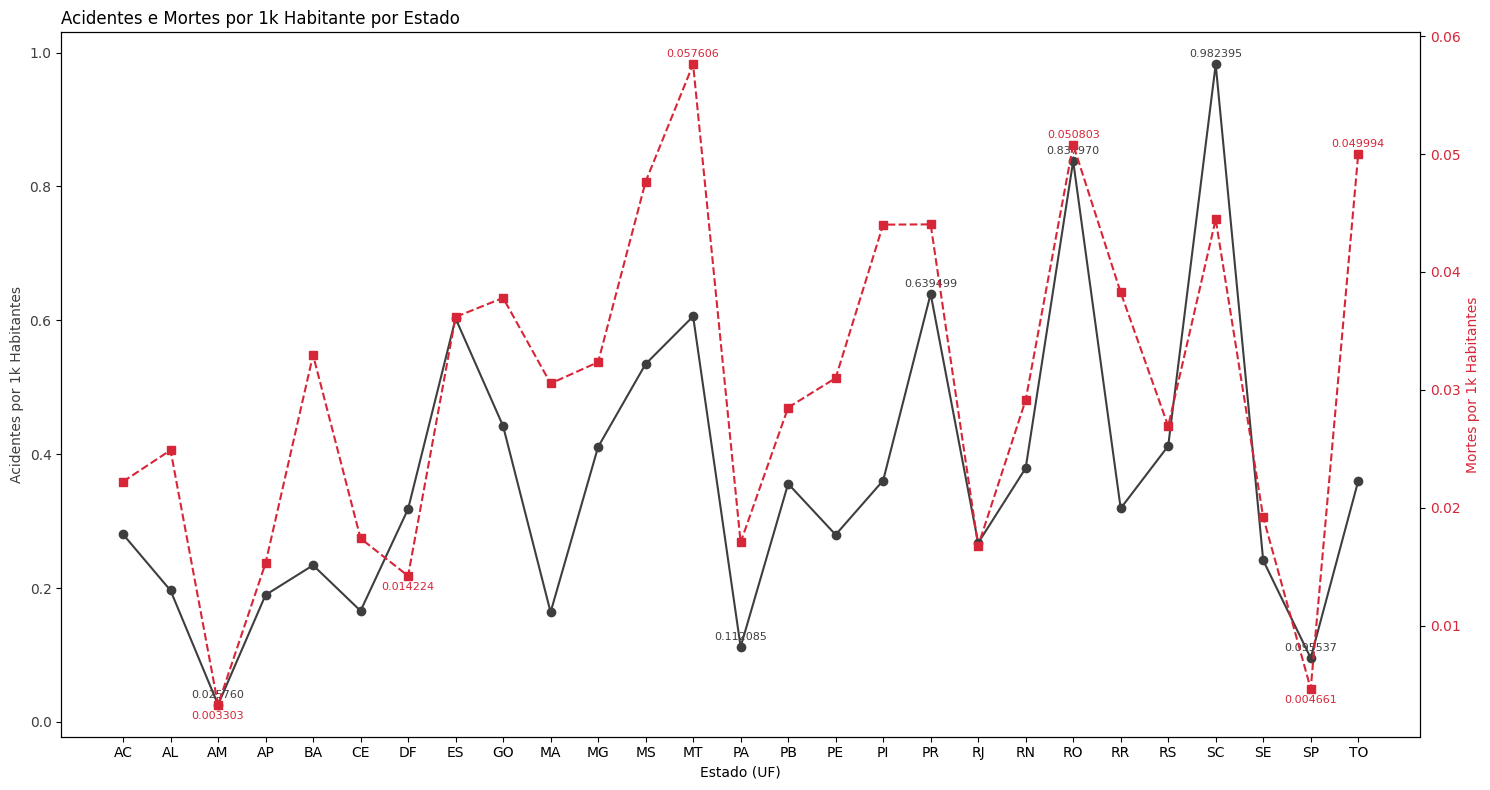

In [68]:

# Criar a figura e os eixos
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

# Plotando os acidentes por habitante no primeiro eixo (ax1)
ax1.plot(estados["uf"], estados["Acidentes_por_1k_habitantes"], marker='o', color='#3E3E3E', label="Acidentes por 1k Habitante")

# Plotando as mortes por habitante no segundo eixo (ax2)
ax2.plot(estados["uf"], estados["Mortes_por_1k_habitantes"], marker='s', color='#D72638', linestyle="dashed", label="Mortes por 1k Habitante")

# Configurações do eixo 1 (Acidentes)
ax1.set_xlabel("Estado (UF)")
ax1.set_ylabel("Acidentes por 1k Habitantes", color='#3E3E3E')
ax1.tick_params(axis='y', labelcolor='#3E3E3E')

# Configurações do eixo 2 (Mortes)
ax2.set_ylabel("Mortes por 1k Habitantes", color='#D72638')
ax2.tick_params(axis='y', labelcolor='#D72638')

# Título e legendas
ax1.set_title("Acidentes e Mortes por 1k Habitante por Estado", loc="left")
fig.tight_layout()

n = 3

# Encontrar os 'n' maiores e menores valores
top_n_acidentes = estados.nlargest(n, "Acidentes_por_1k_habitantes")
bottom_n_acidentes = estados.nsmallest(n, "Acidentes_por_1k_habitantes")

top_n_mortes = estados.nlargest(n, "Mortes_por_1k_habitantes")
bottom_n_mortes = estados.nsmallest(n, "Mortes_por_1k_habitantes")

# Adicionando rótulos apenas nos pontos mais altos e mais baixos
for x, y in zip(top_n_acidentes.index, top_n_acidentes["Acidentes_por_1k_habitantes"]):
    ax1.annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8, color='#3E3E3E')

for x, y in zip(bottom_n_acidentes.index, bottom_n_acidentes["Acidentes_por_1k_habitantes"]):
    ax1.annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8, color='#3E3E3E')

for x, y in zip(top_n_mortes.index, top_n_mortes["Mortes_por_1k_habitantes"]):
    ax2.annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8, color='#D72638')

for x, y in zip(bottom_n_mortes.index, bottom_n_mortes["Mortes_por_1k_habitantes"]):
    ax2.annotate(f'{y:.6f}', xy=(x, y), xytext=(0, -10), textcoords='offset points', ha='center', fontsize=8, color='#D72638')

plt.show()


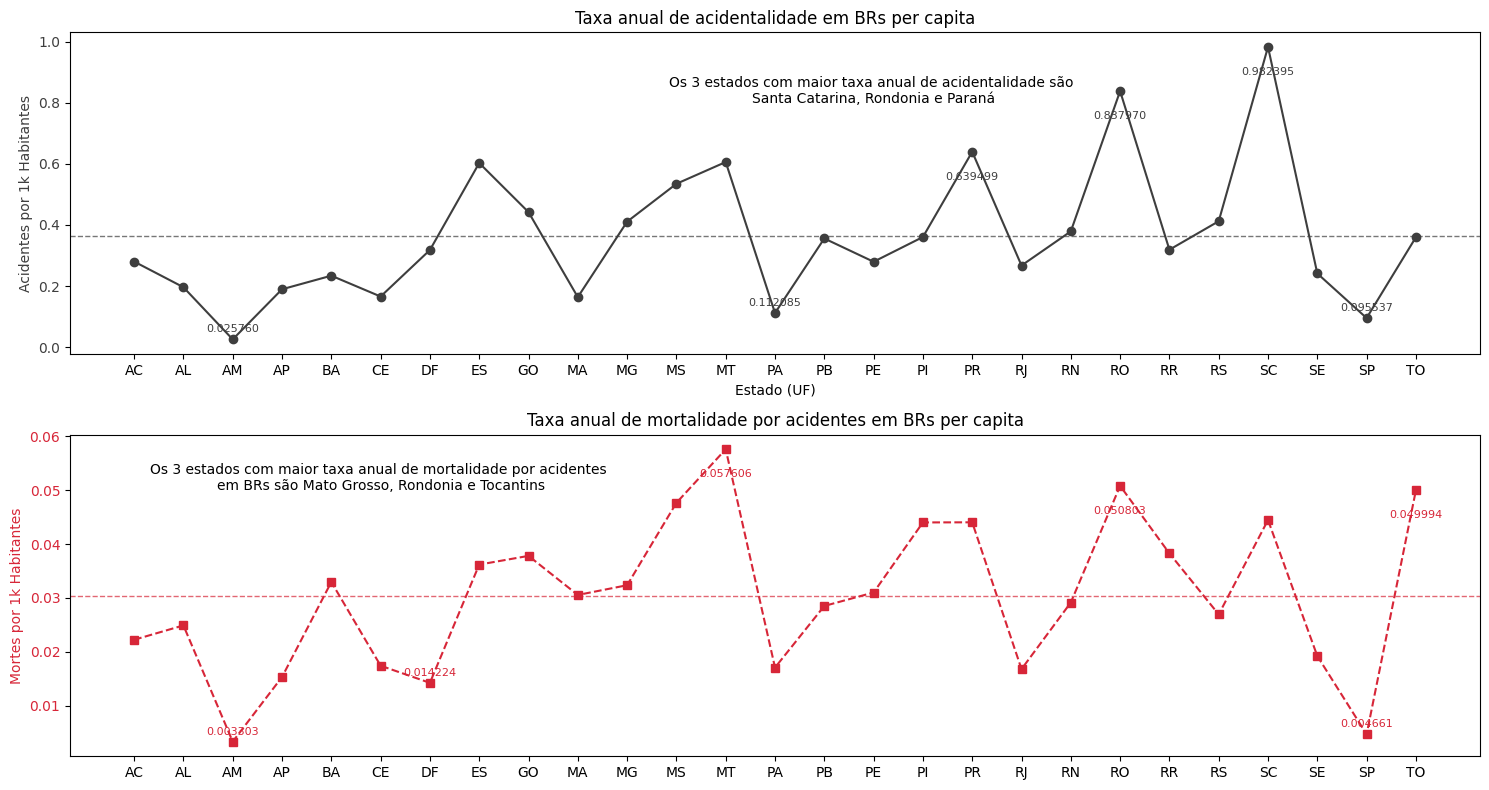

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Criar a figura e os eixos
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

# Plotando os acidentes por habitante no primeiro eixo (ax[0])
ax[0].plot(estados["uf"], estados["Acidentes_por_1k_habitantes"], marker='o', color='#3E3E3E', label="Acidentes por 1k Habitante")

# Plotando as mortes por habitante no segundo eixo (ax[1])
ax[1].plot(estados["uf"], estados["Mortes_por_1k_habitantes"], marker='s', color='#D72638', linestyle="dashed", label="Mortes por 1k Habitante")

# Configurações do eixo 1 (Acidentes)
ax[0].set_xlabel("Estado (UF)")
ax[0].set_ylabel("Acidentes por 1k Habitantes", color='#3E3E3E')
ax[0].tick_params(axis='y', labelcolor='#3E3E3E')

# Adicionar linhas horizontais nos eixos Y
ax[0].axhline(y=estados["Acidentes_por_1k_habitantes"].mean(), color='#3E3E3E', linestyle='--', linewidth=1, alpha=0.7, label="Média Acidentes")
ax[1].axhline(y=estados["Mortes_por_1k_habitantes"].mean(), color='#D72638', linestyle='--', linewidth=1, alpha=0.7, label="Média Mortes")

# Configurações do eixo 2 (Mortes)
ax[1].set_ylabel("Mortes por 1k Habitantes", color='#D72638')
ax[1].tick_params(axis='y', labelcolor='#D72638')

# Título e legendas
ax[0].set_title("Taxa anual de acidentalidade em BRs per capita", loc="center")
ax[1].set_title("Taxa anual de mortalidade por acidentes em BRs per capita", loc="center")
fig.tight_layout()

n = 3

# Encontrar os 'n' maiores e menores valores
top_n_acidentes = estados.nlargest(n, "Acidentes_por_1k_habitantes")
bottom_n_acidentes = estados.nsmallest(n, "Acidentes_por_1k_habitantes")

top_n_mortes = estados.nlargest(n, "Mortes_por_1k_habitantes")
bottom_n_mortes = estados.nsmallest(n, "Mortes_por_1k_habitantes")

# Adicionando rótulos apenas nos pontos mais altos e mais baixos
for x, y in zip(top_n_acidentes.index, top_n_acidentes["Acidentes_por_1k_habitantes"]):
    ax[0].annotate(f'{y:.6f}', xy=(x, y), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=8, color='#3E3E3E')

for x, y in zip(bottom_n_acidentes.index, bottom_n_acidentes["Acidentes_por_1k_habitantes"]):
    ax[0].annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8, color='#3E3E3E')

for x, y in zip(top_n_mortes.index, top_n_mortes["Mortes_por_1k_habitantes"]):
    ax[1].annotate(f'{y:.6f}', xy=(x, y), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=8, color='#D72638')

for x, y in zip(bottom_n_mortes.index, bottom_n_mortes["Mortes_por_1k_habitantes"]):
    ax[1].annotate(f'{y:.6f}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8, color='#D72638')

ax[0].annotate(
    xy=(15, 0.8),
    text="Os 3 estados com maior taxa anual de acidentalidade são \nSanta Catarina, Rondonia e Paraná",  # Texto da anotação
    ha="center",  # Alinhamento do texto
)

ax[1].annotate(
    xy=(5, 0.05),
    text="Os 3 estados com maior taxa anual de mortalidade por acidentes \nem BRs são Mato Grosso, Rondonia e Tocantins",  # Texto da anotação
    ha="center",  # Alinhamento do texto
)

plt.show()
